In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/CFA-CFA_MC')

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CFA-CFA_MC/yeast.csv')
data

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [ ]:
# prompt: Using dataframe data: name

data['name'].value_counts()

,count
name,
CYT,463
NUC,429
MIT,244
ME3,163
ME2,51
ME1,44
EXC,35
VAC,30
POX,20


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Encode categorical feature 'name'
le = LabelEncoder()
data['name'] = le.fit_transform(data['name'])

# Separate features and target
X = data.drop(columns=['name']).values
y = data['name'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------
# Train and evaluate classifiers
# ----------------------------------

# 1. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 2. k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 3. Multilayer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# ----------------------------------
# Print evaluation results
# ----------------------------------

def evaluate_classifier(y_test, y_pred, classifier_name):
    print(f"\n--- Evaluation for {classifier_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

evaluate_classifier(y_test, y_pred_rf, "Random Forest")
evaluate_classifier(y_test, y_pred_knn, "k-Nearest Neighbors")
evaluate_classifier(y_test, y_pred_mlp, "Multilayer Perceptron")


--- Evaluation for Random Forest ---
Confusion Matrix:
 [[59  1  0  0  3  4 29  0  0]
 [ 1  4  0  0  0  3  0  0  0]
 [ 0  3  5  0  0  0  0  0  0]
 [ 0  0  1  3  0  1  1  0  0]
 [ 0  0  0  1 32  0  1  0  0]
 [10  0  0  2  3 30  7  0  0]
 [23  0  0  0  5  6 51  0  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 2  1  0  0  0  1  2  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.62        96
           2       0.44      0.50      0.47         8
           3       0.83      0.62      0.71         8
           4       0.50      0.50      0.50         6
           5       0.74      0.94      0.83        34
           6       0.67      0.58      0.62        52
           7       0.56      0.60      0.58        85
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         6

    accuracy                           0.63       297
   macro avg       0.60      0.60      0.59       29

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and 

In [ ]:
!pip install imblearn

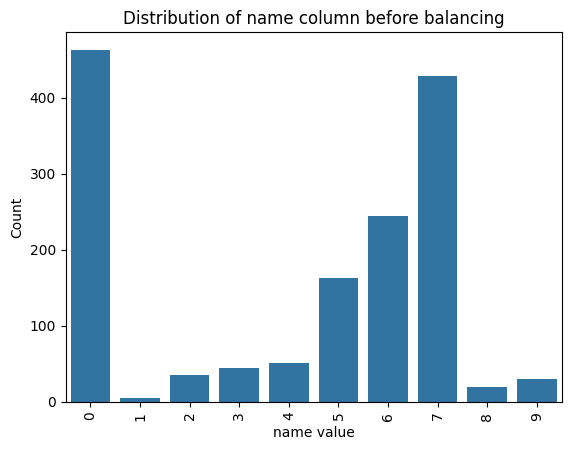

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ví dụ: vẽ đồ thị phân bố của cột 'name' trước khi cân bằng
sns.countplot(x='name', data=data)
plt.xlabel('name value')
plt.ylabel('Count')
plt.title('Distribution of name column before balancing')
plt.xticks(rotation=90)  # Xoay nhãn trục x nếu cần
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from cfa import CFA

# Load the dataset
df = data.copy()

# Separate features and target
X = df.drop(columns=['name']).values
y = df['name'].values

# Identify minority classes in 'name'
unique_classes, counts = np.unique(y, return_counts=True)
minority_classes = unique_classes[counts < 10]

# Apply CFA to balance minority classes in 'name'
synthetic_instances = []
synthetic_labels = []
for minority_class in minority_classes:
    print(f"Balancing class: {minority_class}")

    # Create a binary target variable for the current minority class
    y_binary = np.where(y == minority_class, 1, 0)

    # Apply CFA
    cfa = CFA(fd=1, tol=0.1)  # Adjust fd and tol as needed
    X_resampled, y_resampled = cfa.run_cfa(X, y_binary)

    # Extract synthetic instances for the current minority class
    synthetic_indices = np.where(y_resampled[len(y):] == 1)[0]
    synthetic_instances.extend(X_resampled[len(y):][synthetic_indices])
    synthetic_labels.extend([minority_class] * len(synthetic_indices))

# Combine original data with synthetic instances
X_balanced = np.concatenate((X, synthetic_instances))
y_balanced = np.concatenate((y, synthetic_labels))

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# ----------------------------------
# Train and evaluate classifiers
# ----------------------------------

# 1. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 2. k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 3. Multilayer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# ----------------------------------
# Print evaluation results
# ----------------------------------

def evaluate_classifier(y_test, y_pred, classifier_name):
    print(f"\n--- Evaluation for {classifier_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

evaluate_classifier(y_test, y_pred_rf, "Random Forest")
evaluate_classifier(y_test, y_pred_knn, "k-Nearest Neighbors")
evaluate_classifier(y_test, y_pred_mlp, "Multilayer Perceptron")

Balancing class: 1

--- Evaluation for Random Forest ---
Confusion Matrix:
 [[ 57   1   1   0   0   2   5  20   0   0]
 [  2 284   1   0   0   1   1   1   0   0]
 [  1   1   4   1   1   0   2   0   0   0]
 [  0   1   1   4   1   0   0   0   0   0]
 [  2   3   0   1   1   0   0   2   0   0]
 [  0   5   0   0   0  33   0   4   0   0]
 [  9   4   0   0   0   3  30   3   0   0]
 [ 22   5   0   0   0   5   4  50   0   0]
 [  2   0   0   0   0   0   0   1   0   0]
 [  2   2   0   0   1   4   0   1   0   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.66      0.62        86
           1       0.93      0.98      0.95       290
           2       0.57      0.40      0.47        10
           3       0.67      0.57      0.62         7
           4       0.25      0.11      0.15         9
           5       0.69      0.79      0.73        42
           6       0.71      0.61      0.66        49
           7       0.61      0.58   

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and 

In [ ]:
# Create a new DataFrame with balanced data
balanced_df = pd.DataFrame(X_balanced, columns=df.columns[:-1]) # Use original column names except 'name'
balanced_df['name'] = y_balanced

# Save the balanced dataset to a new CSV file
balanced_df.to_csv("/content/drive/MyDrive/CFA-CFA_MC/yeast_balanced.csv", index=False)

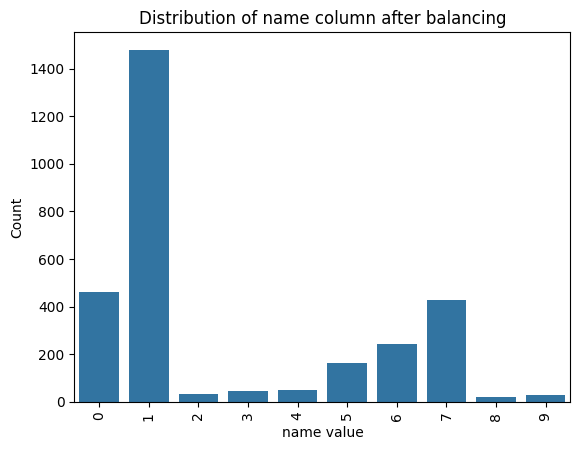

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# vẽ đồ thị phân bố của cột 'name' sau khi cân bằng
sns.countplot(x='name', data=balanced_df)
plt.xlabel('name value')
plt.ylabel('Count')
plt.title('Distribution of name column after balancing')
plt.xticks(rotation=90)  # Xoay nhãn trục x nếu cần
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Encode categorical feature 'name'
le = LabelEncoder()
data['name'] = le.fit_transform(data['name'])

# Separate features and target
X = data.drop(columns=['name']).values
y = data['name'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for each class
X_resampled = []
y_resampled = []
for class_label in np.unique(y_train):
    # Create a binary target variable for the current class
    y_binary = (y_train == class_label).astype(int)

    # Determine k_neighbors based on available samples for the class
    k = min(5, np.sum(y_binary) - 1)  # Ensure k_neighbors is less than the number of samples

    # Apply SMOTE to oversample the minority class
    # If there's only one sample for the class, SMOTE won't be applied
    if np.sum(y_binary) > 1:
        smote_temp = SMOTE(random_state=42, k_neighbors=k)  # Create a temporary SMOTE object with adjusted k
        X_oversampled, y_oversampled = smote_temp.fit_resample(X_train, y_binary)

        # Extract instances belonging to the current class from the oversampled data
        indices = np.where(y_oversampled == 1)[0]
        X_resampled.extend(X_oversampled[indices])
        y_resampled.extend([class_label] * len(indices))
    else:
        # Handle the case where there's only one sample for the class
        indices = np.where(y_binary == 1)[0]
        X_resampled.extend(X_train[indices])
        y_resampled.extend([class_label] * len(indices))

# Convert lists to numpy arrays
X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

# Create a new DataFrame with balanced data
balanced_df = pd.DataFrame(X_resampled, columns=df.columns[:-1])  # Use original column names except 'name'
balanced_df['name'] = y_resampled

# Save the balanced dataset to a new CSV file
balanced_df.to_csv("yeast_balanced_smote.csv", index=False)

# ----------------------------------
# Train and evaluate classifiers
# ----------------------------------

# 1. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

# 2. k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)
y_pred_knn = knn.predict(X_test)

# 3. Multilayer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
mlp.fit(X_resampled, y_resampled)
y_pred_mlp = mlp.predict(X_test)

# ----------------------------------
# Print evaluation results
# ----------------------------------

def evaluate_classifier(y_test, y_pred, classifier_name):
    print(f"\n--- Evaluation for {classifier_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

evaluate_classifier(y_test, y_pred_rf, "Random Forest")
evaluate_classifier(y_test, y_pred_knn, "k-Nearest Neighbors")
evaluate_classifier(y_test, y_pred_mlp, "Multilayer Perceptron")


--- Evaluation for Random Forest ---
Confusion Matrix:
 [[48  1  0  1  4  8 28  2  4]
 [ 1  4  0  0  0  3  0  0  0]
 [ 0  1  5  1  0  0  0  0  1]
 [ 0  0  1  4  0  1  0  0  0]
 [ 0  0  0  1 30  0  2  0  1]
 [ 9  1  0  2  3 30  7  0  0]
 [17  0  0  2  7  9 47  1  2]
 [ 0  0  0  0  0  0  0  2  0]
 [ 1  1  0  0  0  1  1  0  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.50      0.56        96
           2       0.50      0.50      0.50         8
           3       0.83      0.62      0.71         8
           4       0.36      0.67      0.47         6
           5       0.68      0.88      0.77        34
           6       0.58      0.58      0.58        52
           7       0.55      0.55      0.55        85
           8       0.40      1.00      0.57         2
           9       0.20      0.33      0.25         6

    accuracy                           0.58       297
   macro avg       0.53      0.63      0.55       29

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data (replace 'yeast.csv' with your data file)
#data = pd.read_csv('yeast.csv')

# Encode categorical feature 'name'
le = LabelEncoder()
data['name'] = le.fit_transform(data['name'])

# Separate features and target
X = data.drop(columns=['name']).values
y = data['name'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN for each class
X_resampled = []
y_resampled = []
for class_label in np.unique(y_train):
    # Create a binary target variable for the current class
    y_binary = (y_train == class_label).astype(int)

    # Determine n_neighbors based on available samples for the class
    n_neighbors = min(5, np.sum(y_binary) - 1)  # Ensure n_neighbors is less than the number of samples

    # Apply ADASYN to oversample the minority class
    # If there's only one sample for the class, ADASYN won't be applied
    if np.sum(y_binary) > 1:
        adasyn_temp = ADASYN(random_state=42, n_neighbors=n_neighbors)  # Create a temporary ADASYN object
        X_oversampled, y_oversampled = adasyn_temp.fit_resample(X_train, y_binary)

        # Extract instances belonging to the current class from the oversampled data
        indices = np.where(y_oversampled == 1)[0]
        X_resampled.extend(X_oversampled[indices])
        y_resampled.extend([class_label] * len(indices))
    else:
        # Handle the case where there's only one sample for the class
        indices = np.where(y_binary == 1)[0]
        X_resampled.extend(X_train[indices])
        y_resampled.extend([class_label] * len(indices))

# Convert lists to numpy arrays
X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

# Create a new DataFrame with balanced data
balanced_df = pd.DataFrame(X_resampled, columns=data.columns[:-1])  # Use original column names except 'name'
balanced_df['name'] = y_resampled

# Save the balanced dataset to a new CSV file
balanced_df.to_csv("yeast_balanced_adasyn.csv", index=False)

# ----------------------------------
# Train and evaluate classifiers
# ----------------------------------

# 1. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

# 2. k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)
y_pred_knn = knn.predict(X_test)

# 3. Multilayer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
mlp.fit(X_resampled, y_resampled)
y_pred_mlp = mlp.predict(X_test)

# ----------------------------------
# Print evaluation results
# ----------------------------------

def evaluate_classifier(y_test, y_pred, classifier_name):
    print(f"\n--- Evaluation for {classifier_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

evaluate_classifier(y_test, y_pred_rf, "Random Forest")
evaluate_classifier(y_test, y_pred_knn, "k-Nearest Neighbors")
evaluate_classifier(y_test, y_pred_mlp, "Multilayer Perceptron")


--- Evaluation for Random Forest ---
Confusion Matrix:
 [[40  1  0  1  4 13 27  3  7]
 [ 2  4  0  0  0  2  0  0  0]
 [ 0  0  6  1  0  0  0  0  1]
 [ 0  0  1  3  0  1  1  0  0]
 [ 0  0  0  1 30  0  1  0  2]
 [ 9  1  0  2  4 29  7  0  0]
 [13  0  0  2  7 12 47  1  3]
 [ 0  0  0  0  0  0  0  2  0]
 [ 0  1  0  0  0  2  1  0  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.42      0.50        96
           2       0.57      0.50      0.53         8
           3       0.86      0.75      0.80         8
           4       0.30      0.50      0.37         6
           5       0.67      0.88      0.76        34
           6       0.49      0.56      0.52        52
           7       0.56      0.55      0.56        85
           8       0.33      1.00      0.50         2
           9       0.13      0.33      0.19         6

    accuracy                           0.55       297
   macro avg       0.50      0.61      0.53       29

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
